# Uppgift 1

## a)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st
from scipy import optimize as op


def primes(n):
    factors = []
    d = 2
    while d <= n:
        if n % d == 0:
            factors.append(d)
            n = n / d
        else:
            d += 1
    return factors

numbers = np.arange(2,100,1)
nr_prime_factors = []

for number in numbers:
    nr_prime_factors.append(len(primes(number)))

nr_prime_factors = np.array(nr_prime_factors)

ex: int = np.sum(nr_prime_factors) / np.size(nr_prime_factors)

print(f'E(X) = {round(ex, 2)}')

E(X) = 2.4


## b)

In [3]:
nr_events: dict = {}
prob = []

for n in range(1, nr_prime_factors.max() + 1):
    nr_events[n] = np.count_nonzero(nr_prime_factors == n)
    prob.append(np.count_nonzero(nr_prime_factors == n)/len(nr_prime_factors))

xk = np.arange(1,len(prob) + 1)
pk = np.array(prob)

print(xk,pk)

distr = st.rv_discrete(values=(xk,pk), name='prime_factors')

print(round(distr.mean(),2))

[1 2 3 4 5 6] [0.25510204 0.34693878 0.2244898  0.1122449  0.04081633 0.02040816]
2.4


## c)

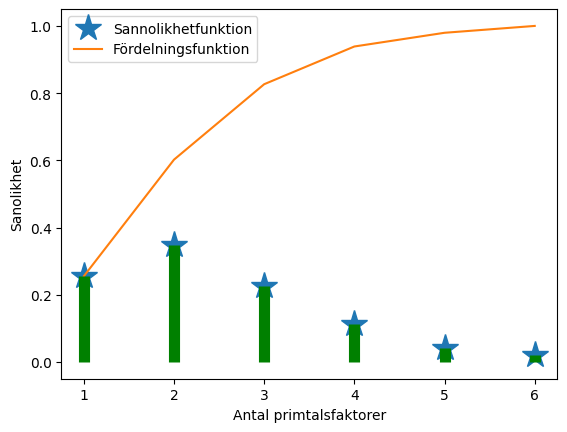

In [4]:
fig, ax= plt.subplots(1, 1)

ax.plot(xk, distr.pmf(xk), '*', ms=20, label='Sannolikhetfunktion')
ax.plot(xk, distr.cdf(xk), label='Fördelningsfunktion')
ax.vlines(xk, 0, distr.pmf(xk), colors='g', lw=8)
ax.set_xlabel('Antal primtalsfaktorer')
ax.set_ylabel('Sanolikhet')
ax.legend()

plt.show()

## d)

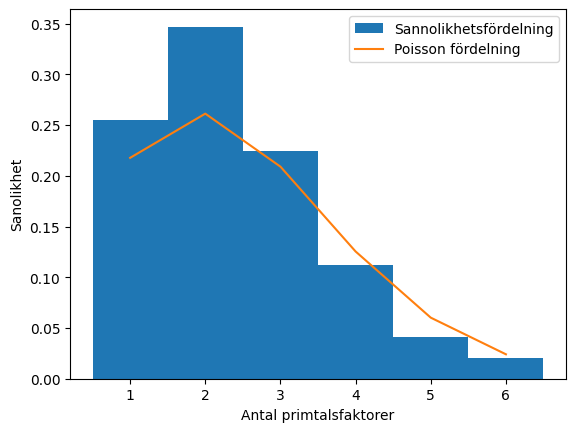

In [5]:


fig, ax = plt.subplots(1, 1)

ax.stairs(pk, np.arange(0.5,7.5,1), fill=True, label='Sannolikhetsfördelning')
ax.plot(xk, st.poisson.pmf(xk, 2.4), label='Poisson fördelning')
ax.set_xlabel('Antal primtalsfaktorer')
ax.set_ylabel('Sanolikhet')
ax.legend()

plt.show()

# Uppgift 2

## a)

In [6]:
raw_data = pd.read_csv('all_exoplanets_2021.csv')

data = raw_data[["Mass", "Equilibrium Temperature", "Stellar Radius", "Stellar Mass"]]

data

,Mass,Equilibrium Temperature,Stellar Radius,Stellar Mass
0,6165.6000,NaN,19.00,2.70
1,4684.8142,NaN,29.79,2.78
2,1525.5000,NaN,11.00,2.20
3,1481.0878,NaN,0.93,0.90
4,565.7374,NaN,1.13,1.08
...,...,...,...,...
4570,6547.0000,NaN,26.80,2.30
4571,218.5310,NaN,1.56,1.30
4572,629.5950,NaN,1.56,1.30
4573,1313.2200,NaN,1.56,1.30


## b)

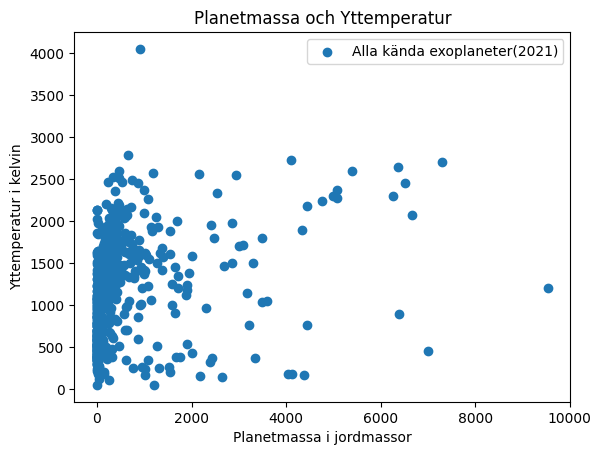

In [7]:

fig , ax = plt.subplots()
ax.scatter(data["Mass"],data["Equilibrium Temperature"], label='Alla kända exoplaneter(2021)')
ax.set_xlabel("Planetmassa i jordmassor")
ax.set_ylabel("Yttemperatur i kelvin")
ax.set_title("Planetmassa och Yttemperatur")
ax.legend()
plt.show()

## c)

/tmp/ipykernel_19200/4257155601.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


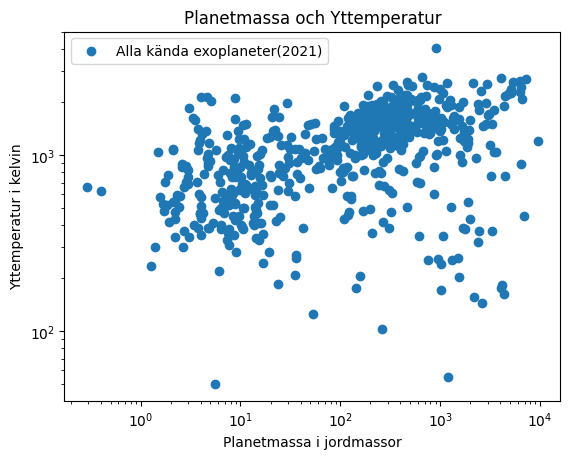

In [8]:

fig , ax = plt.subplots()
ax.scatter(data["Mass"],data["Equilibrium Temperature"], label='Alla kända exoplaneter(2021)')
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Planetmassa i jordmassor")
ax.set_ylabel("Yttemperatur i kelvin")
ax.set_title("Planetmassa och Yttemperatur")
ax.legend()

fig.show()

## d)

      Mass  Equilibrium Temperature  Stellar Radius  Stellar Mass
165   3.75                    387.0            0.30          0.30
171   2.64                    300.0            0.21          0.18
225   2.69                    370.0            0.39          0.39
4005  3.06                    342.0            0.30          0.27
4171  1.27                    234.0            0.14          0.12
4185  1.40                    301.0            0.20          0.17
4210  2.20                    344.0            0.42          0.45


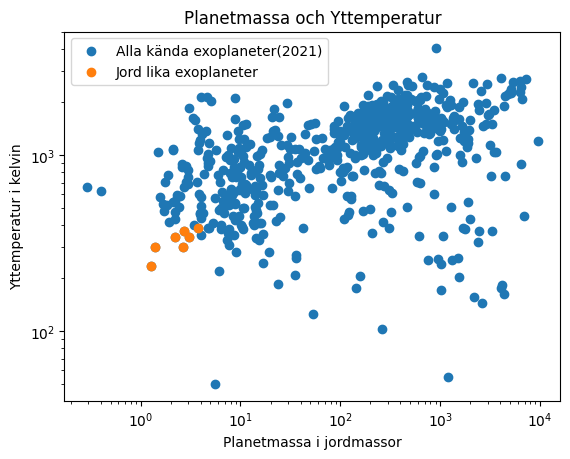

In [9]:
earth_like = data.query('0.5 < Mass < 4 & 200 < `Equilibrium Temperature` < 400')

print(earth_like)

fig , ax = plt.subplots()
ax.scatter(data["Mass"],data["Equilibrium Temperature"], label='Alla kända exoplaneter(2021)')
ax.scatter(earth_like["Mass"],earth_like["Equilibrium Temperature"], label='Jord lika exoplaneter')
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Planetmassa i jordmassor")
ax.set_ylabel("Yttemperatur i kelvin")
ax.set_title("Planetmassa och Yttemperatur")
ax.legend()

plt.show()

## e)


In [10]:
correlation = data.corr(numeric_only=True)
print(correlation)

                             Mass  Equilibrium Temperature  Stellar Radius  \
Mass                     1.000000                 0.256222        0.478028   
Equilibrium Temperature  0.256222                 1.000000        0.540628   
Stellar Radius           0.478028                 0.540628        1.000000   
Stellar Mass             0.347847                 0.615532        0.605107   

                         Stellar Mass  
Mass                         0.347847  
Equilibrium Temperature      0.615532  
Stellar Radius               0.605107  
Stellar Mass                 1.000000  


In [11]:
corr1 = np.array(data[['Stellar Mass', 'Equilibrium Temperature']].dropna())
corr2 = np.array(data[['Stellar Mass', 'Stellar Radius']].dropna())

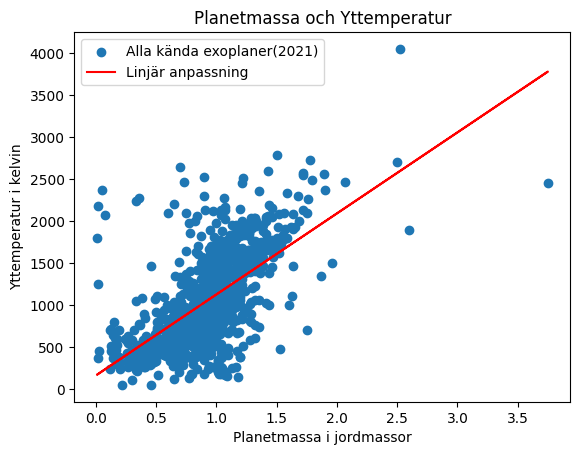

Slope: 965.0
Intercept: 161.0
R-squared value: 0.379


In [12]:

slope, intercept, r_value, p_value, std_err = st.linregress(corr1)
line = slope * corr1[:,0]+ intercept

fig , ax = plt.subplots()
ax.scatter(data["Stellar Mass"],data["Equilibrium Temperature"], label='Alla kända exoplaner(2021)')
ax.plot(corr1[:,0], line, color='red', label='Linjär anpassning')
ax.set_xlabel("Planetmassa i jordmassor")
ax.set_ylabel("Yttemperatur i kelvin")
ax.set_title("Planetmassa och Yttemperatur")
ax.legend()

plt.show()

print(f"Slope: {slope.round(0)}")
print(f"Intercept: {intercept.round(0)}")
print(f"R-squared value: {(r_value**2).round(3)}")

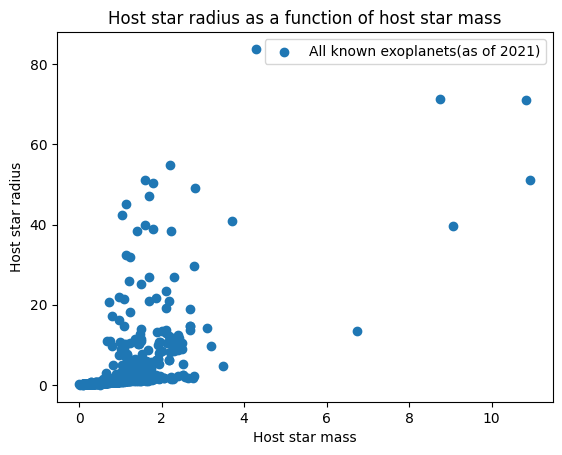

In [13]:
fig , ax = plt.subplots()
ax.scatter(data["Stellar Mass"],data["Stellar Radius"], label='All known exoplanets(as of 2021)')
ax.set_xlabel("Host star mass")
ax.set_ylabel("Host star radius")
ax.set_title("Host star radius as a function of host star mass")
ax.legend()

plt.show()


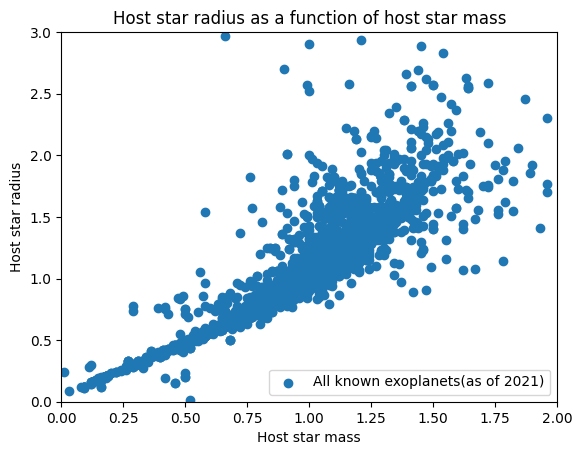

In [14]:
fig , ax = plt.subplots()
ax.scatter(data["Stellar Mass"],data["Stellar Radius"], label='All known exoplanets(as of 2021)')
ax.set_xlabel("Host star mass")
ax.set_ylabel("Host star radius")
ax.set_title("Host star radius as a function of host star mass")
ax.set_ybound(0,3)
ax.set_xbound(0,2)
ax.legend()

plt.show()


# f)

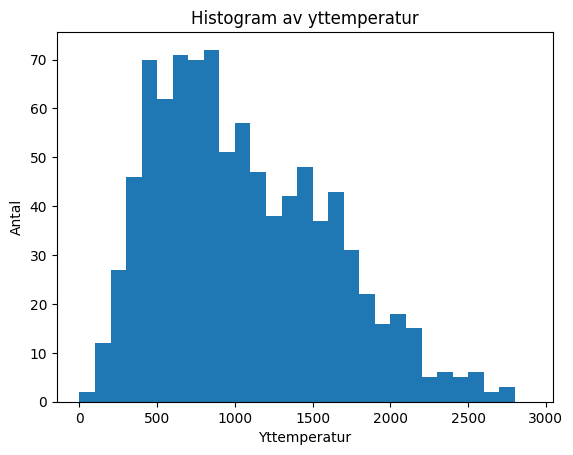

In [15]:
BINS = np.arange(0, 3000, 100)

fig, ax = plt.subplots()

ax.hist(data['Equilibrium Temperature'], bins=BINS)
ax.set_xlabel('Yttemperatur')
ax.set_ylabel('Antal')
ax.set_title('Histogram av yttemperatur')

plt.show()

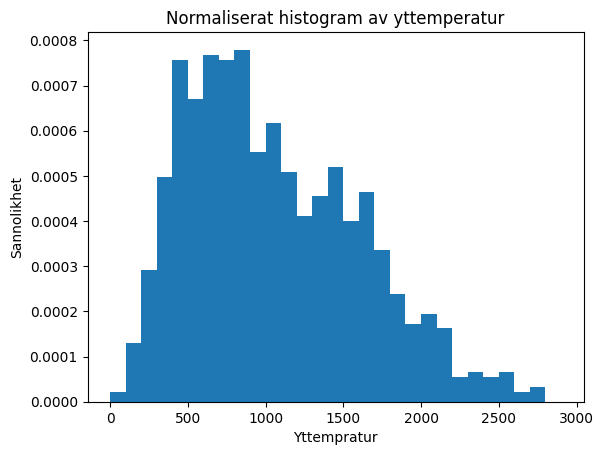

In [16]:
BINS = np.arange(0, 3000, 100)

fig, ax = plt.subplots()

ax.hist(data['Equilibrium Temperature'], bins=BINS, density=True)
ax.set_xlabel('Yttempratur')
ax.set_ylabel('Sannolikhet')
ax.set_title('Normaliserat histogram av yttemperatur')

plt.show()

[]

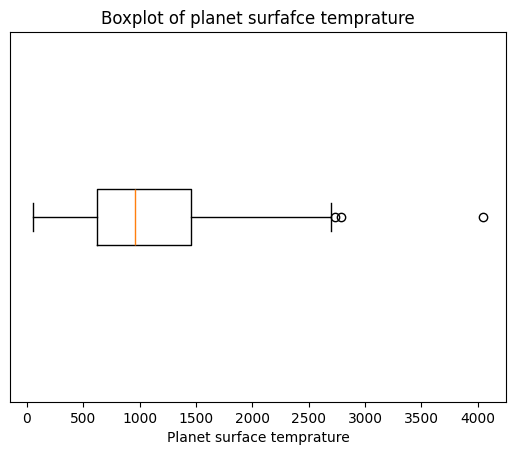

In [17]:
fig, ax = plt.subplots()

ax.boxplot(data['Equilibrium Temperature'].dropna(), vert=False)
ax.set_xlabel('Planet surface temprature')
ax.set_title('Boxplot of planet surfafce temprature')
ax.set_yticklabels([])
ax.set_yticks([])